In [2]:
%matplotlib inline

使用罗辑回归对手写字体进行识别，训练数据使用MNIST数据集。<br>
MNIST 数据集来自美国国家标准与技术研究所, National Institute of Standards and Technology (NIST). <br>
训练集 (training set) 由来自 250 个不同人手写的数字构成, 其中 50% 是高中学生, 50% 来自人口普查局 (the Census Bureau) 的工作人员. 测试集(test set) 也是同样比例的手写数字数据.<br>
每张图片的尺寸是28*28的单通道灰度图<br>
每张图片的标号保存在第一列中

## 1. 导入包

In [31]:
import time
import matplotlib.pyplot as plt
import numpy as np

#from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 2. 加载数据，并对数据进行预处理

In [32]:
raw_data = np.loadtxt('./mnist_train.csv', delimiter=',')
print('Data load Done.')

# 类的标号保存在第一列
X = raw_data[:, 1:]
y = raw_data[:, 0]
print(X.shape)
print(y.shape)

train_samples = 5000
# 转换成1行
#X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000, )

# 对数据进行标准化
scaler = StandardScaler()
# 调用fit_transform将数据缩放到统一尺度，u为均值，s为标准差
# z = (x - u) / s
X_train = scaler.fit_transform(X_train)
# 使用同样的标准对测试集进行缩放
X_test = scaler.transform(X_test)

Data load Done.
(60000, 784)
(60000,)


## 3.训练集可视化

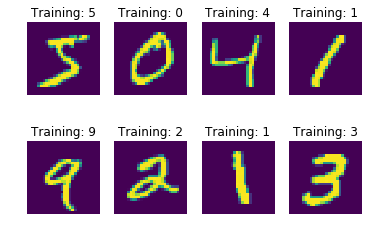

In [17]:
images_and_labels = list(zip(X[:8, ], y[:8, ]))
for index, (image, label) in enumerate(images_and_labels):
    plt.subplot(2, 4, index + 1)
    # 不显示坐标轴
    plt.axis('off')
    plt.imshow(image.reshape(28, 28))
    plt.title('Training: %i' % label)


## 4. 模型训练

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.01, verbose=0, warm_start=False)
Test score with L2 penalty: 0.8775
Example run in 15.049 s


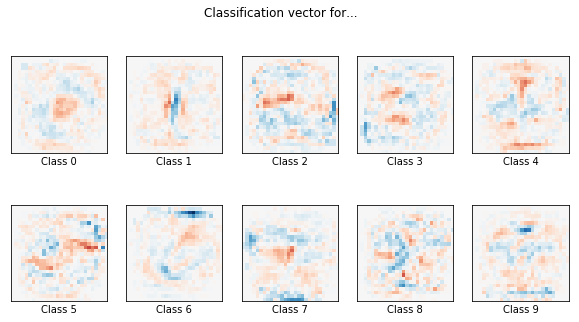

In [29]:
t0 = time.time()

# C为正则化系数λ的倒数，通常默认为1
# tol为收敛条件
clf = LogisticRegression(C=1,
                         multi_class='ovr',
                         penalty='l2', 
                         solver='sag',
                         tol=0.01
                        )
print(clf)
clf.fit(X_train, y_train)

# 获得模型准确度
score = clf.score(X_test, y_test)
print("Test score with L2 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()